# **ACCIVISION AI**

# PREREQUISITES

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.3/107.7 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!pip install albumentations==1.4

In [ ]:
!pip install Pillow==9.5.0

# NAVIGATING TO DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/ACCIVISION_AI/accident_dataset

/content/drive/MyDrive/ACCIVISION_AI/accident_dataset


In [ ]:
%ls

data.yaml  README.dataset.txt  README.roboflow.txt  runs/  test/  train/  valid/  yolov8s.pt


In [ ]:
# %cd train/images

/content/drive/MyDrive/ACCIVISION_AI/accident_dataset/train/images


In [ ]:
# %ls | head -n 150 > keep_images.txt  # List the first 150 images to a file
# %ls | grep -v -f keep_images.txt | xargs -d '\n' rm

In [ ]:
# %cd ../labels

/content/drive/MyDrive/ACCIVISION_AI/accident_dataset/train/labels


In [ ]:
# %ls | head -n 150 > keep_labels.txt  # List the first 150 labels to a file
# %ls | grep -v -f keep_labels.txt | xargs -d '\n' rm

rm: cannot remove ''$'\033'''$'\033''runs'$'\033''/': No such file or directory


In [ ]:
%cat data.yaml

train: /content/drive/MyDrive/ACCIVISION_AI/accident_dataset/train/images
val: /content/drive/MyDrive/ACCIVISION_AI/accident_dataset/valid/images
test: /content/drive/MyDrive/ACCIVISION_AI/accident_dataset/test/images

nc: 3
names: ['accident', 'car', 'fire']

In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=15 imgsz=224 plots=True

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:332: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu')  # load
Ultral

In [ ]:
%ls

data.yaml  README.dataset.txt  README.roboflow.txt  runs/  test/  train/  valid/  yolov8s.pt


# VISUALISATIONS

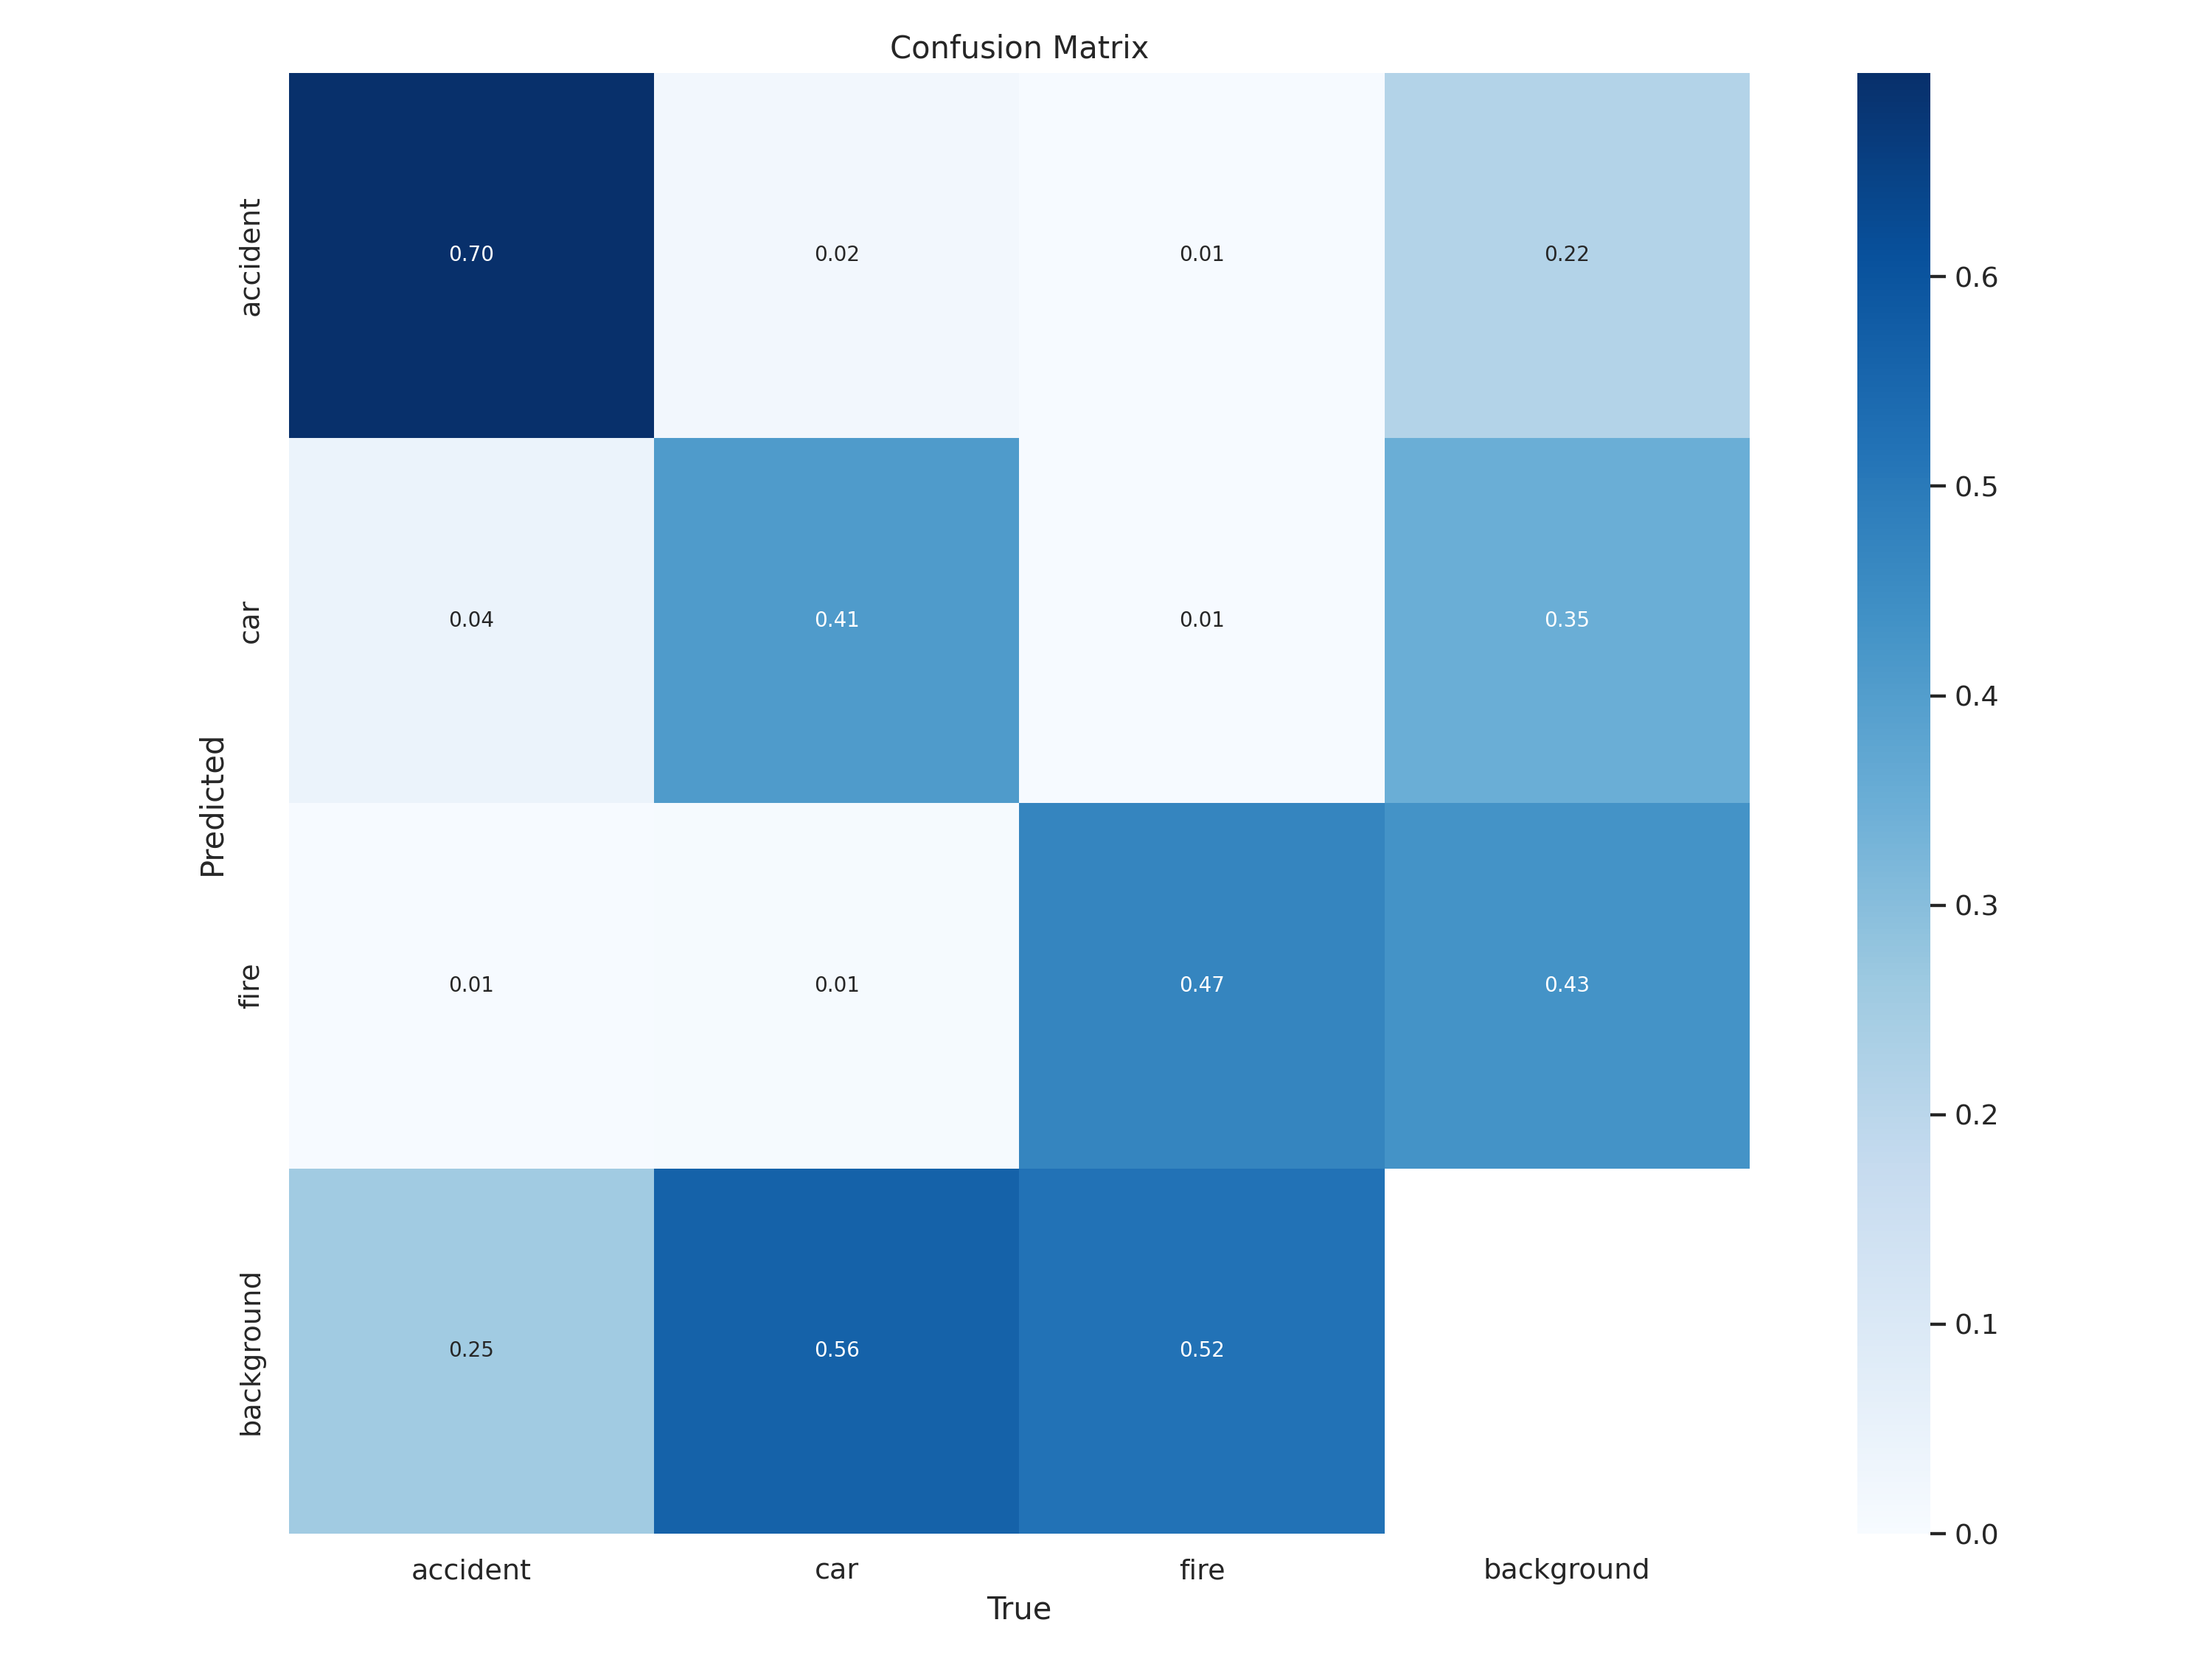

In [ ]:
#change eachtime after running
from IPython.display import Image

Image(filename='runs/detect/train9/confusion_matrix.png', width=600)


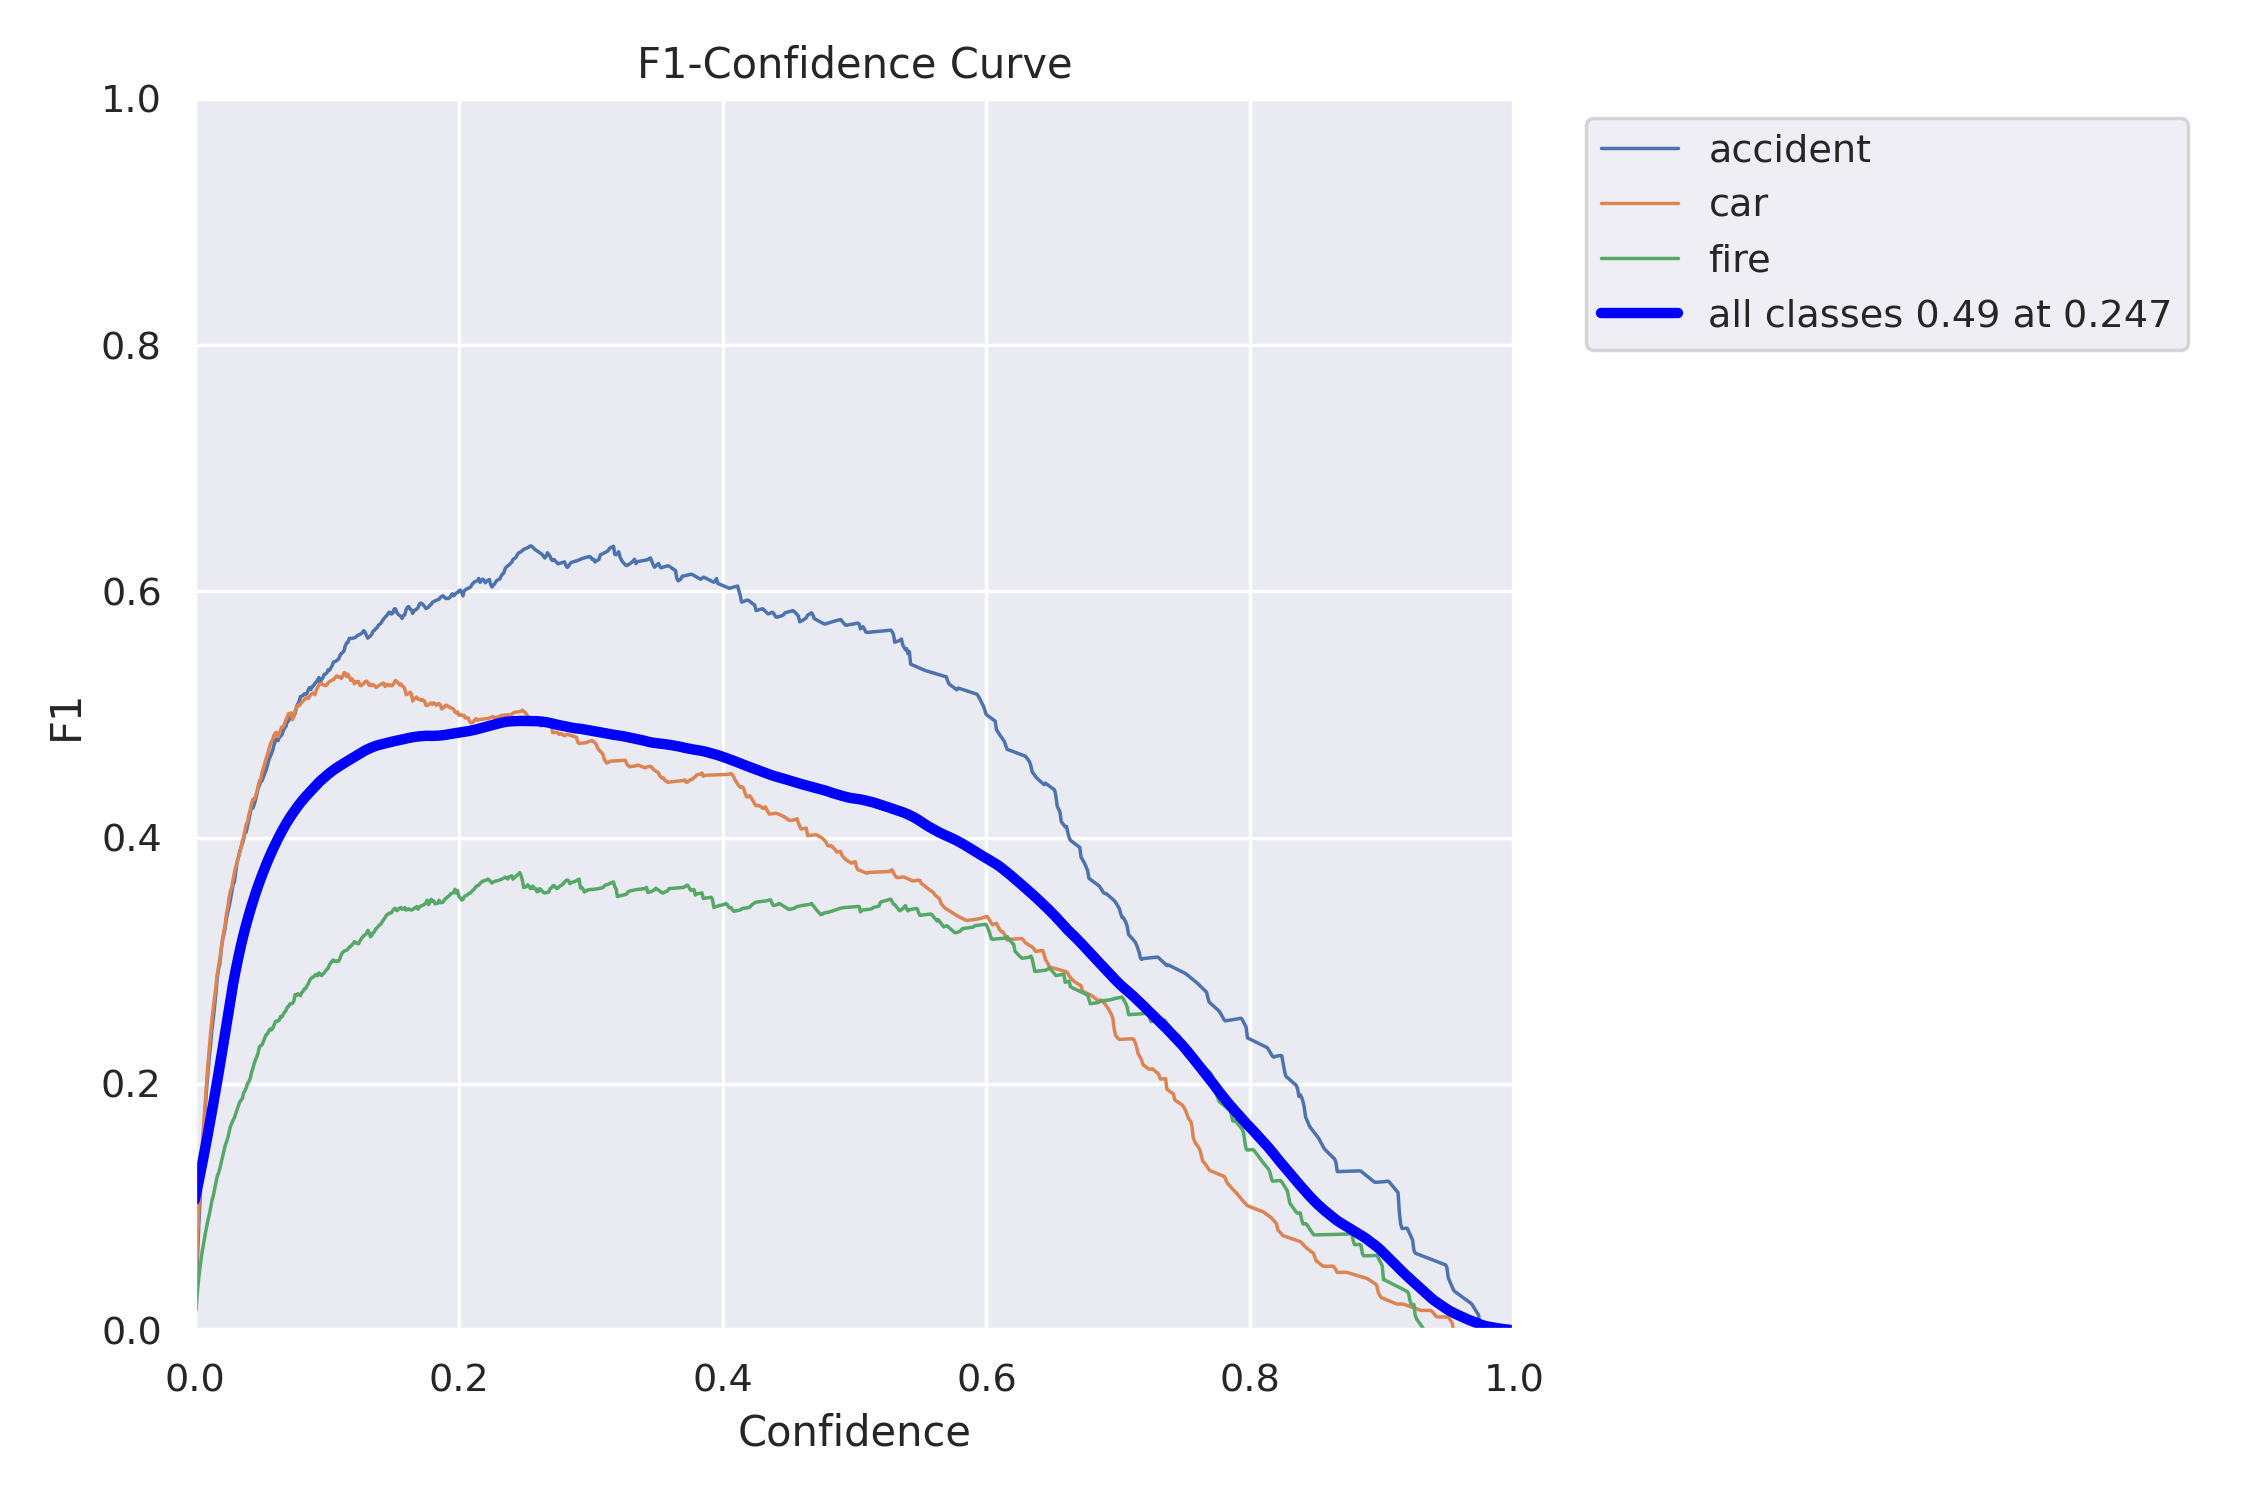

In [ ]:
Image(filename='runs/detect/train9/F1_curve.png', width=600)


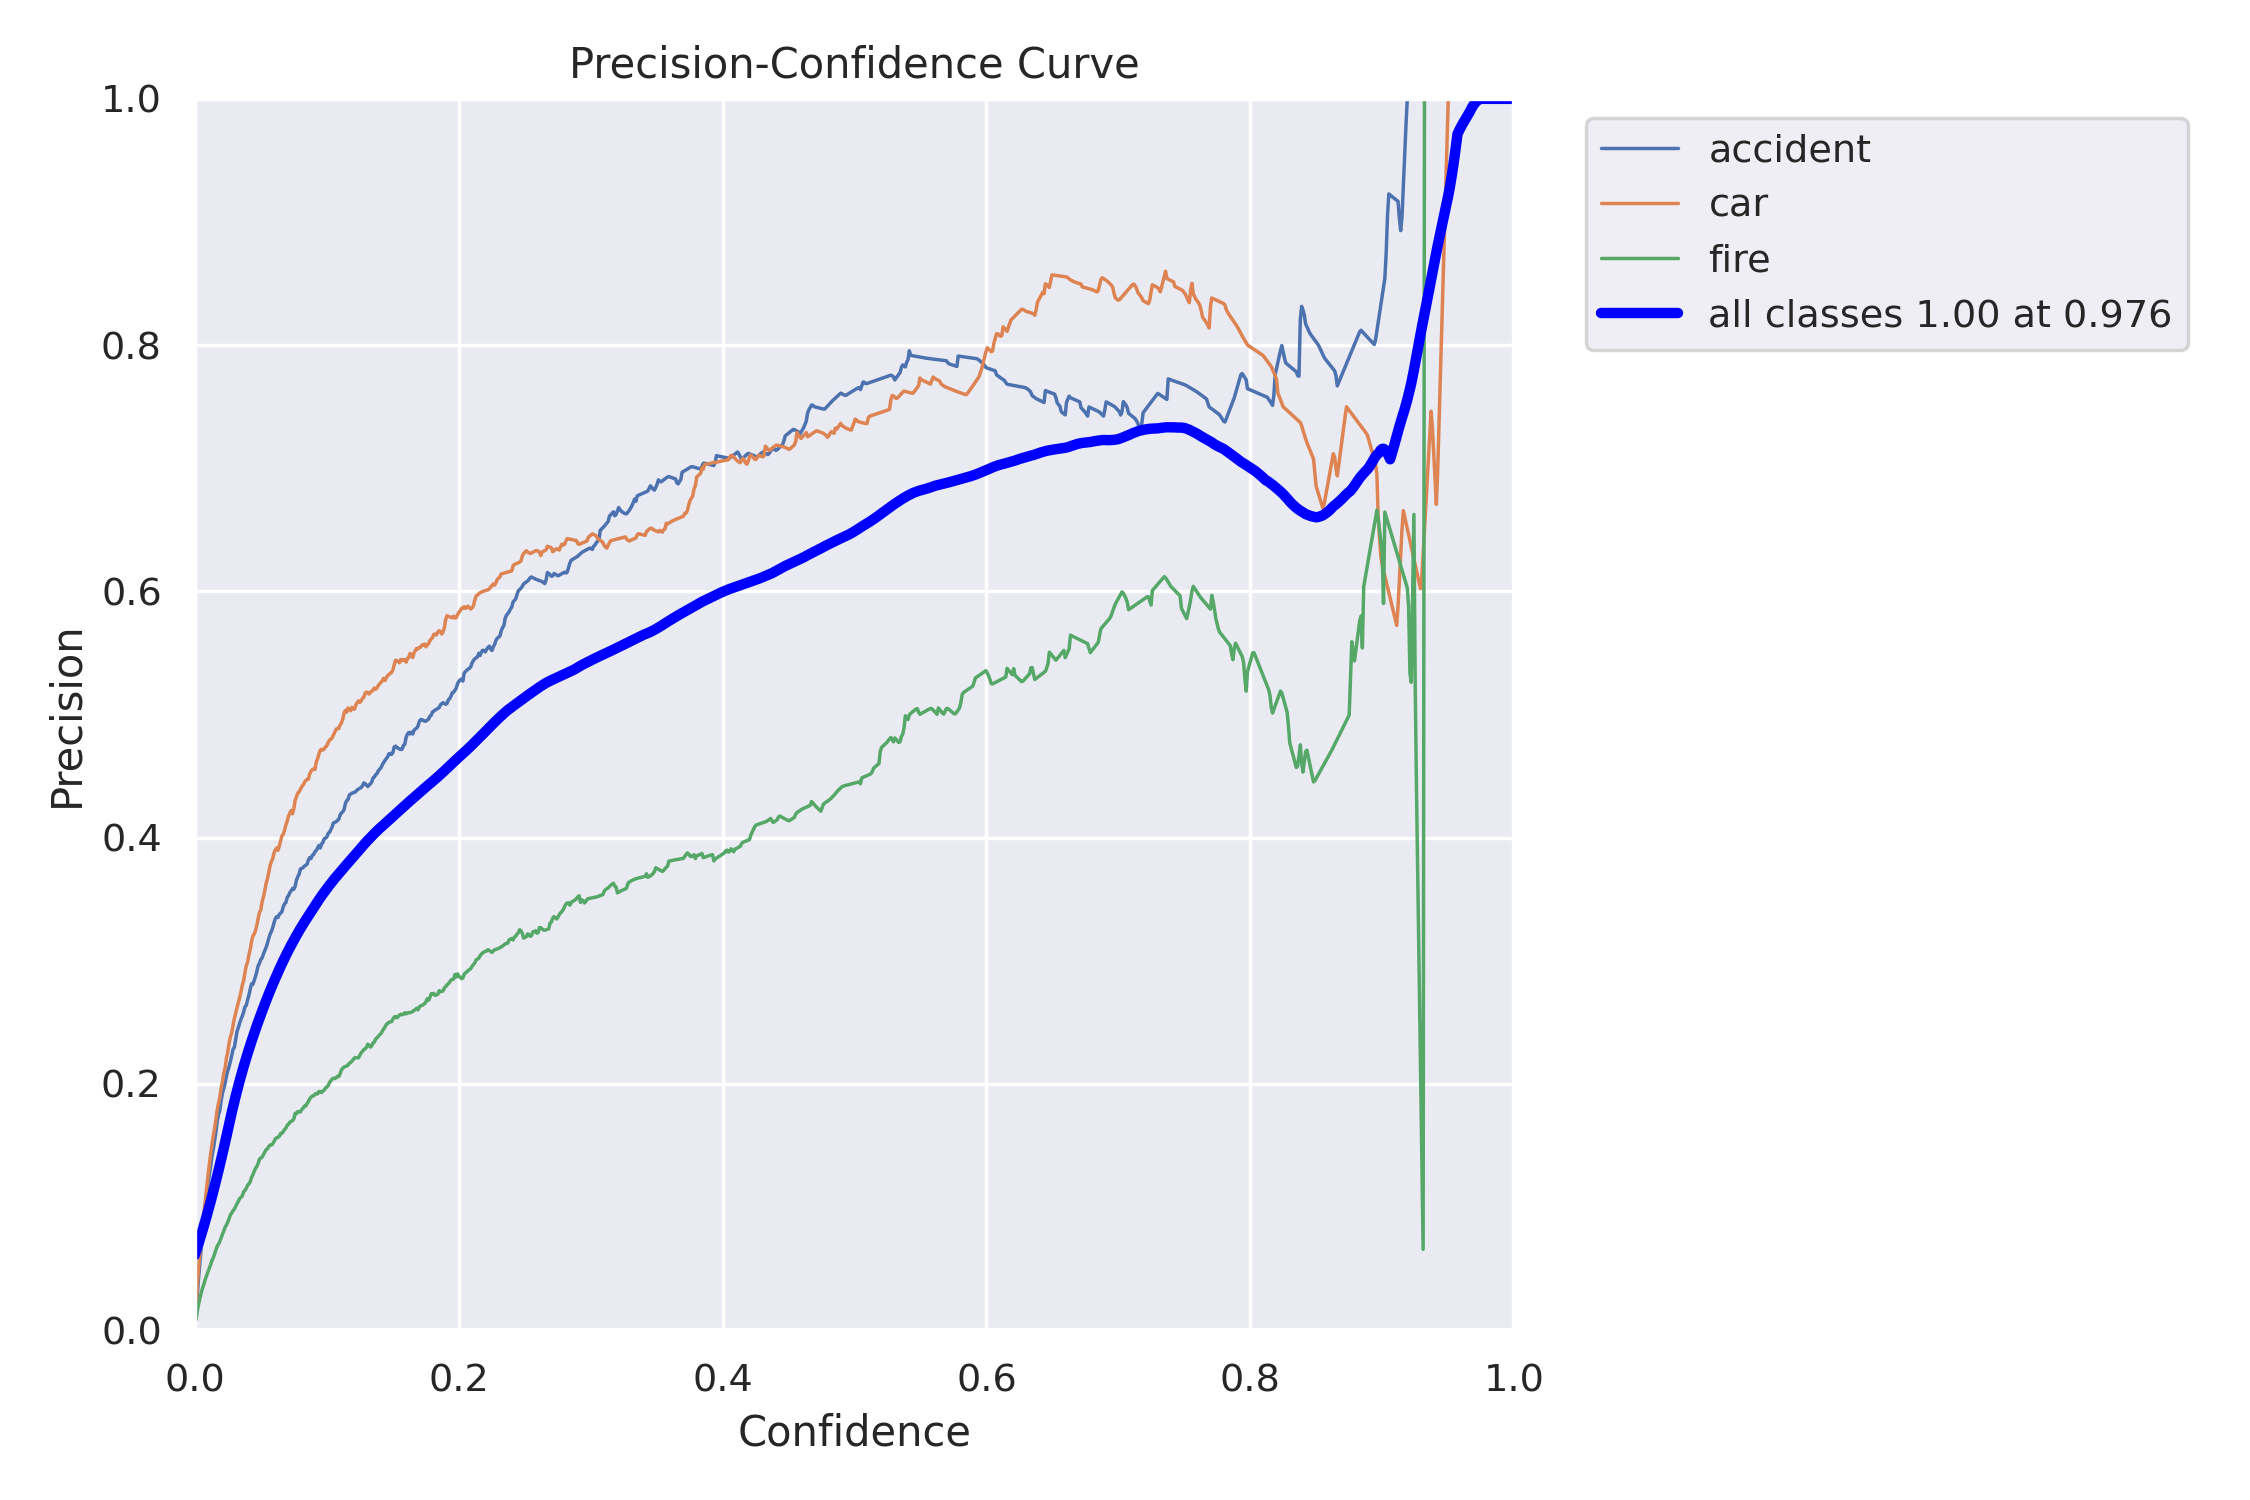

In [ ]:
Image(filename='runs/detect/train9/P_curve.png', width=600)


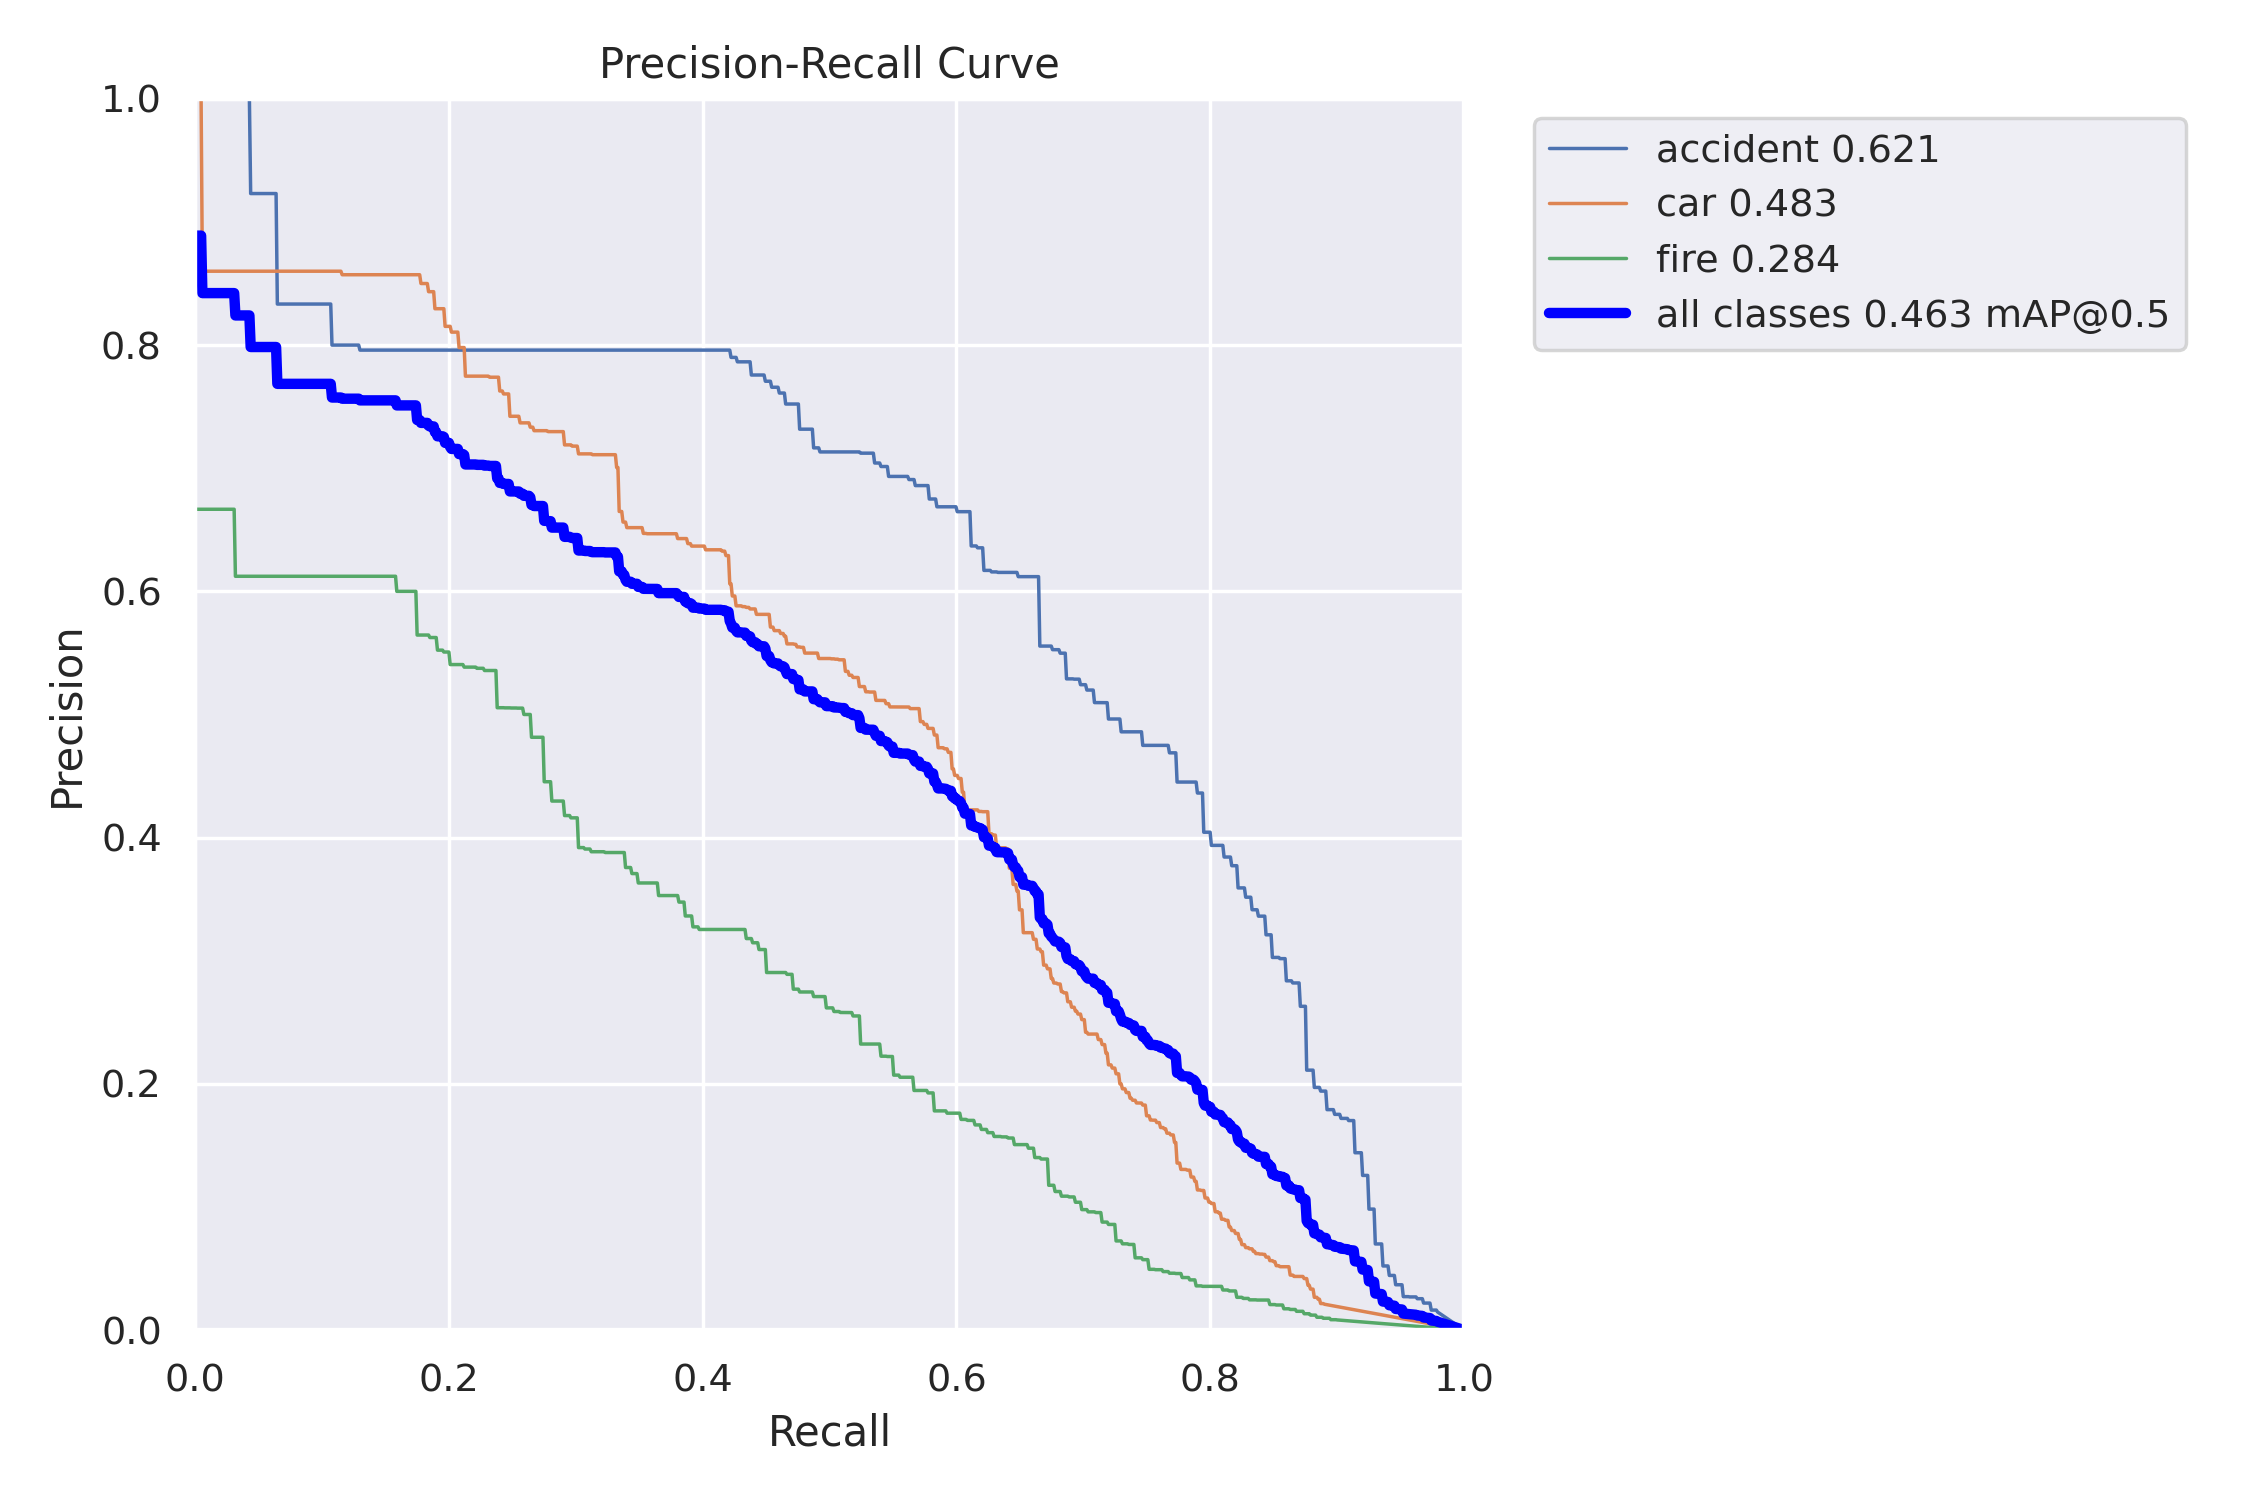

In [ ]:
Image(filename='runs/detect/train9/PR_curve.png', width=600)


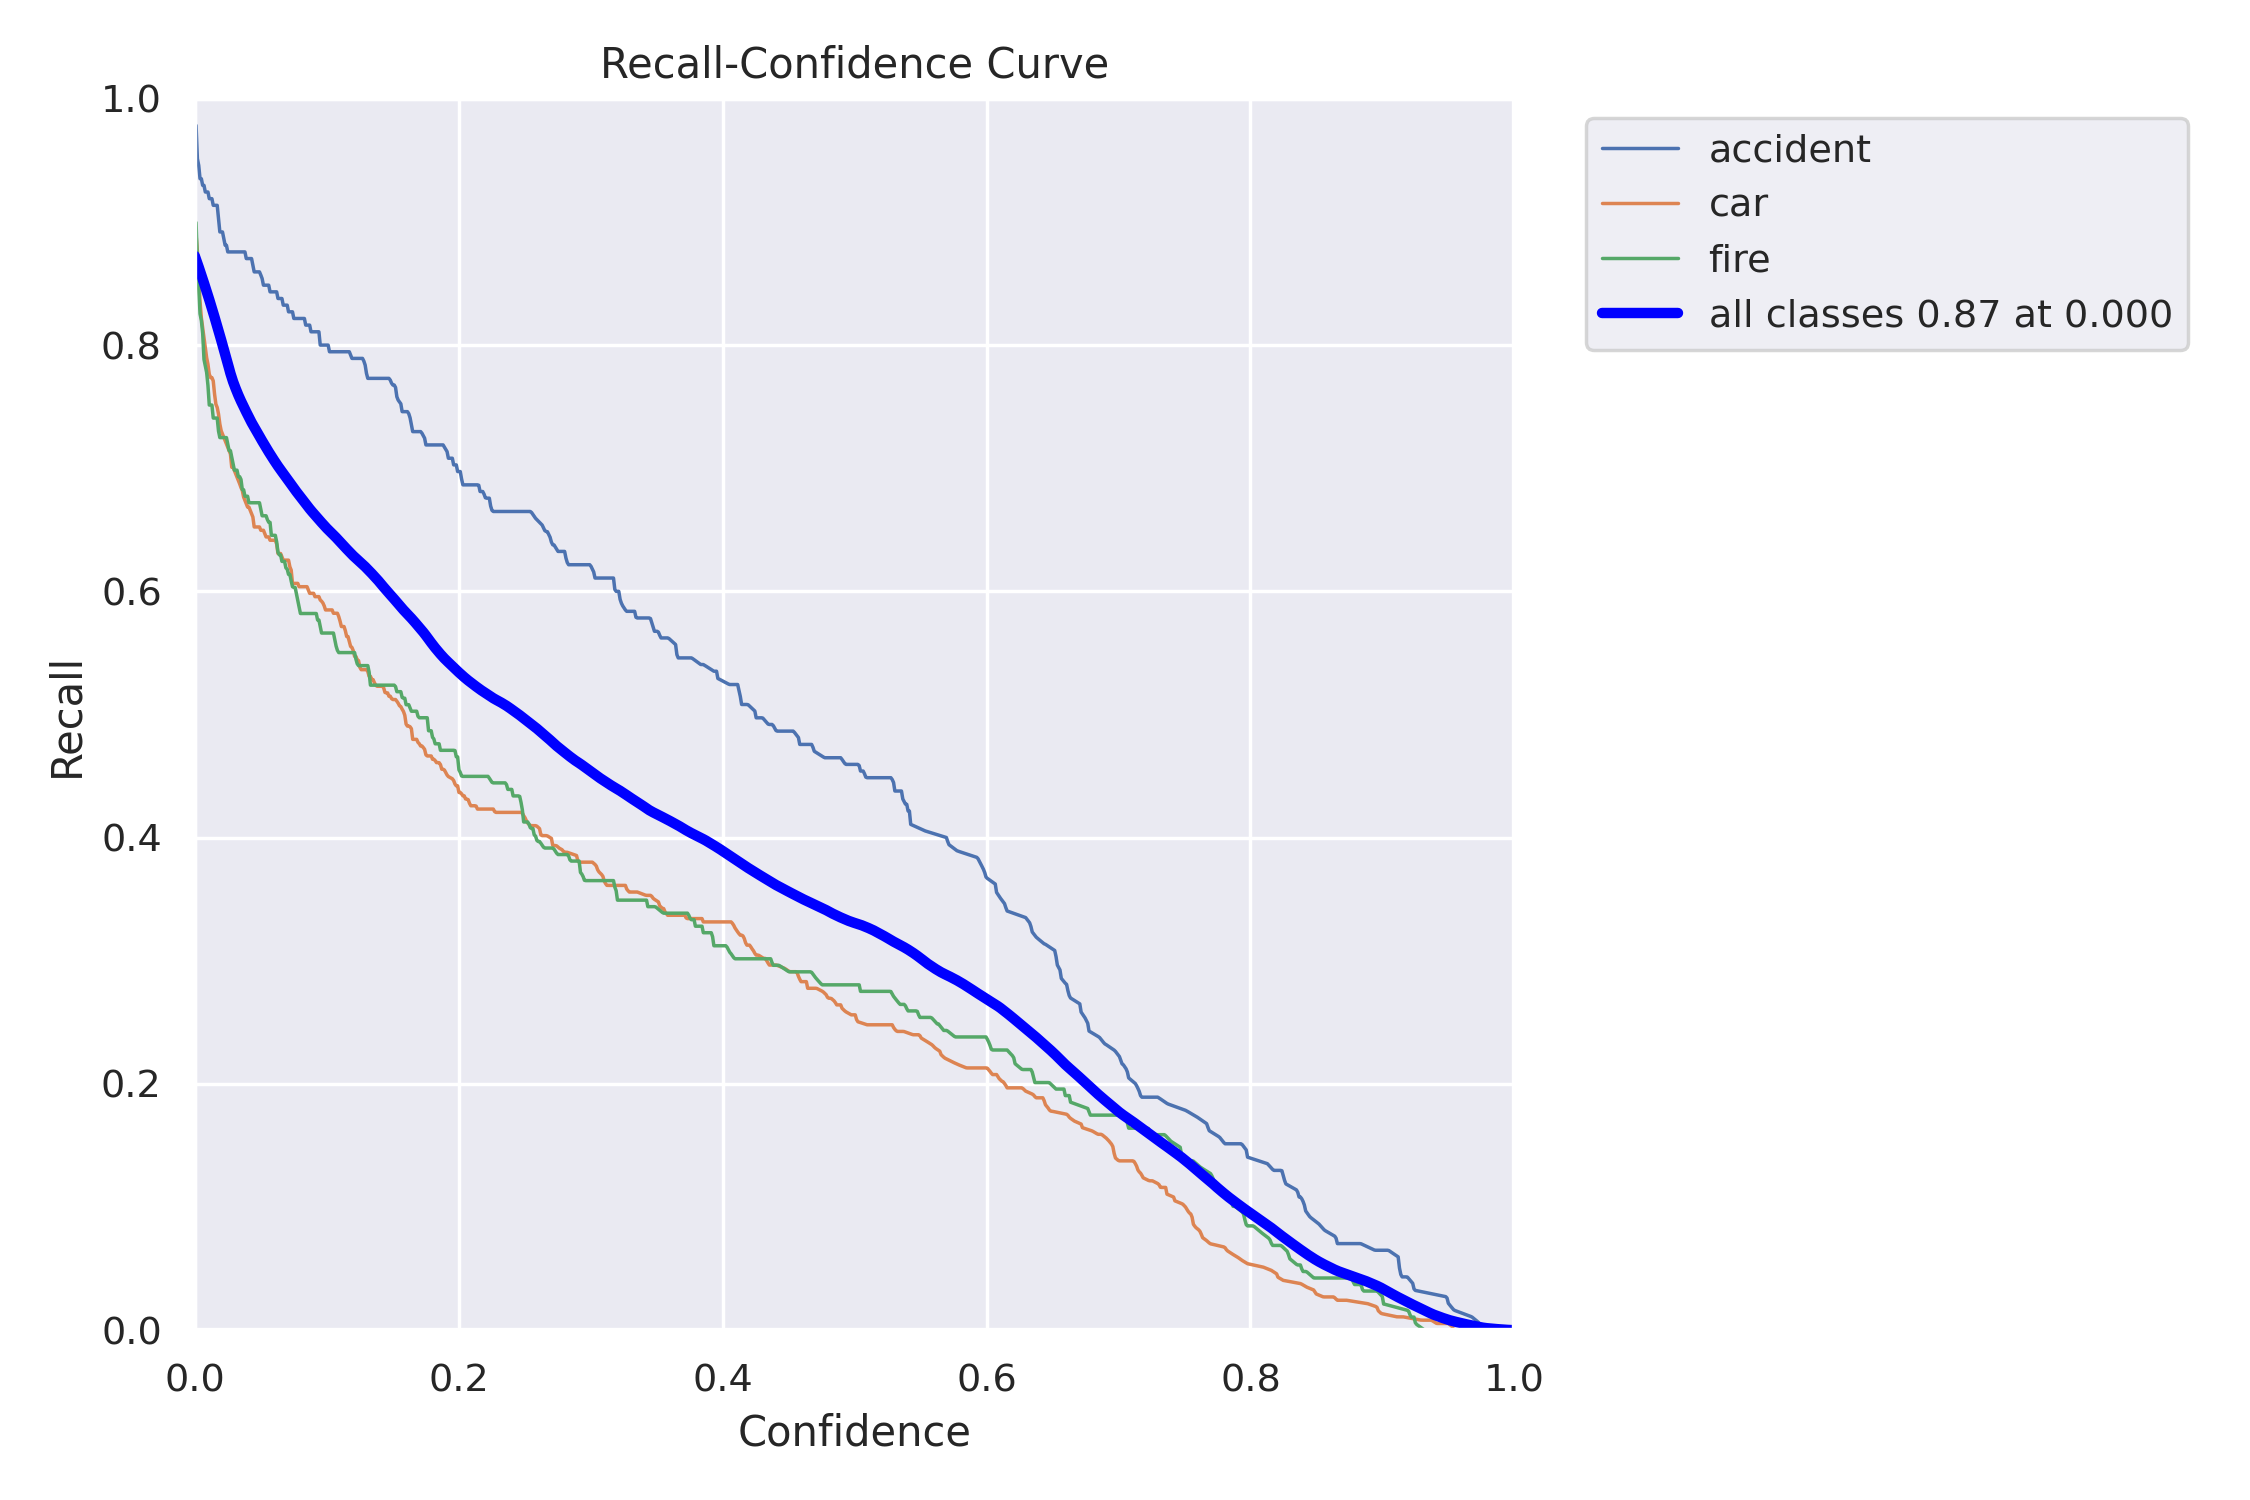

In [ ]:
Image(filename='runs/detect/train9/R_curve.png', width=600)


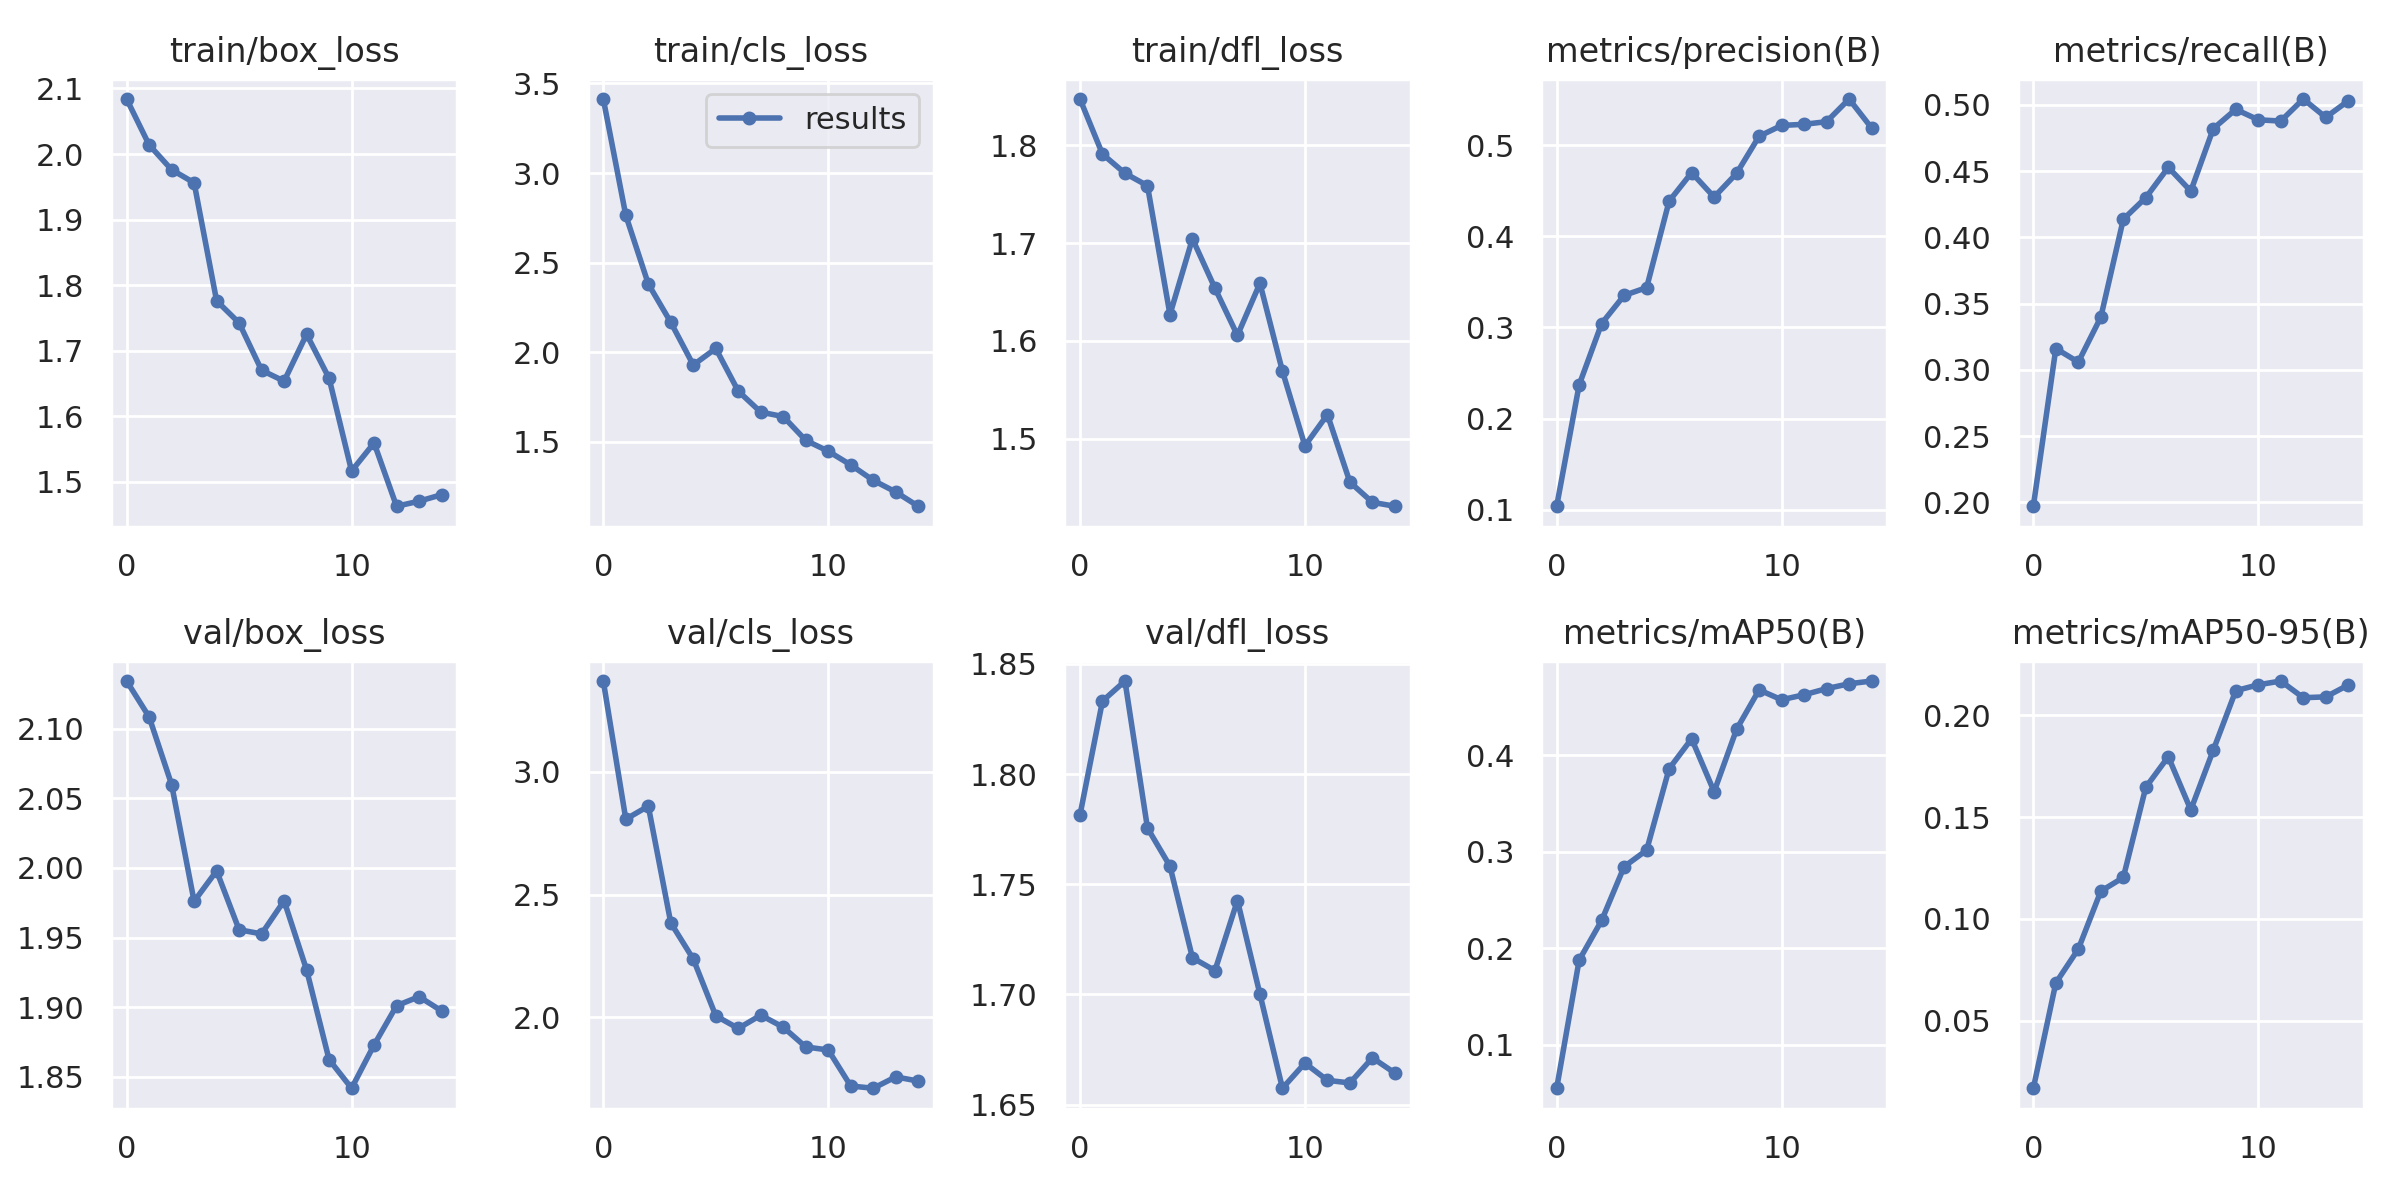

In [ ]:
Image(filename='runs/detect/train9/results.png', width=600)


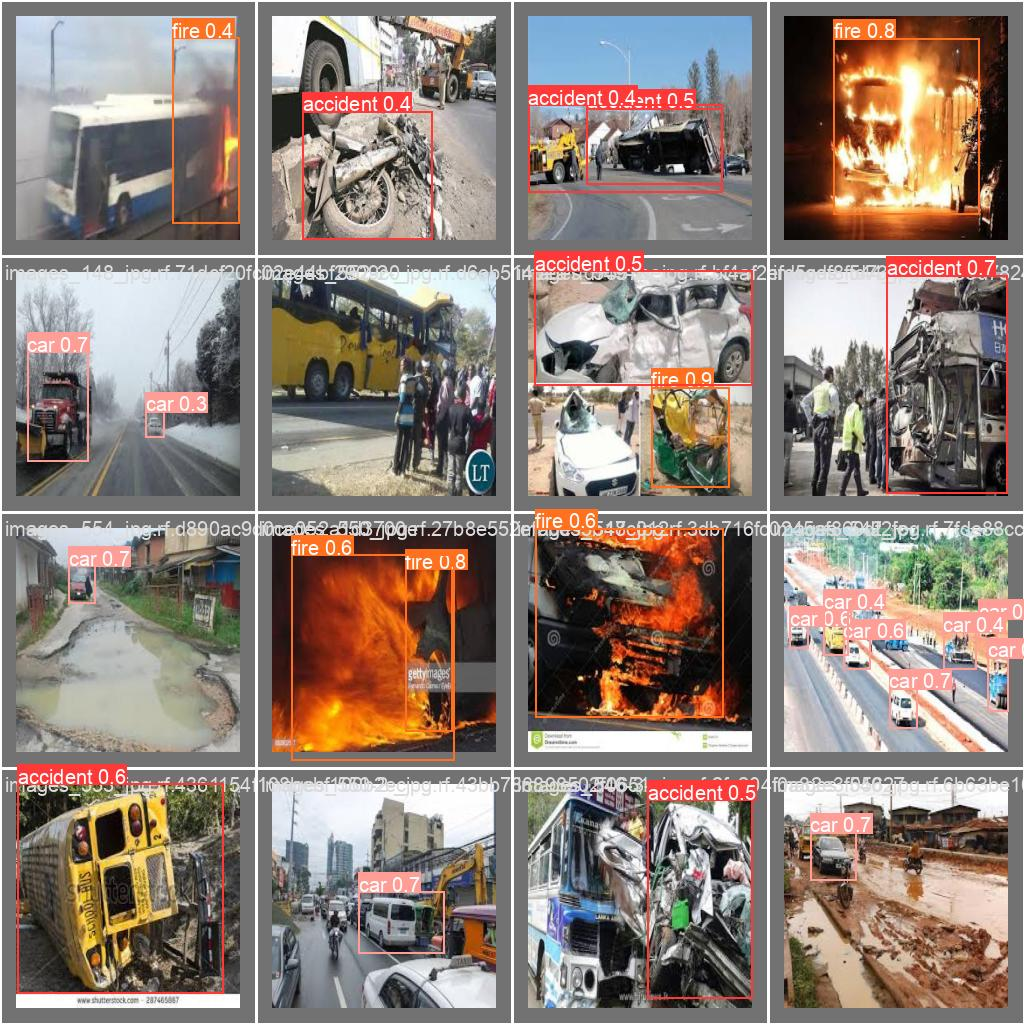

In [ ]:
Image(filename='runs/detect/train9/val_batch0_pred.jpg', width=600)

# VALIDATE MODEL

In [ ]:
%pwd

'/content/drive/MyDrive/ACCIVISION_AI/accident_dataset'

In [ ]:
!yolo task=detect mode=val model=runs/detect/train9/weights/yolov8s.pt data=data.yaml

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:332: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu')  # load
2024-1

In [ ]:
Image(filename='runs/detect/train10/val_batch0_pred.jpg', width=600)

# INFERENCE FROM MODEL

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train9/weights/yolov8s.pt conf=0.25 source=data/test/images

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:332: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu')  # load
2024-1

# RESULTS

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Create the directory if it doesn't exist
os.makedirs('runs/detect/train9', exist_ok=True)

# Create and save sample images
for i in range(3):
    img = np.random.rand(100, 100, 3)  # Random image
    plt.imshow(img)
    plt.axis('off')  # Turn off axis
    plt.savefig(f'runs/detect/train10/sample_image_{i}.jpg', bbox_inches='tight', pad_inches=0)
    plt.close()


Image paths found: ['runs/detect/train9/train_batch0.jpg', 'runs/detect/train9/train_batch1.jpg', 'runs/detect/train9/train_batch2.jpg', 'runs/detect/train9/train_batch50.jpg', 'runs/detect/train9/train_batch51.jpg', 'runs/detect/train9/train_batch52.jpg', 'runs/detect/train9/val_batch0_labels.jpg', 'runs/detect/train9/val_batch0_pred.jpg', 'runs/detect/train9/val_batch1_pred.jpg', 'runs/detect/train9/val_batch1_labels.jpg', 'runs/detect/train9/val_batch2_pred.jpg', 'runs/detect/train9/val_batch2_labels.jpg']


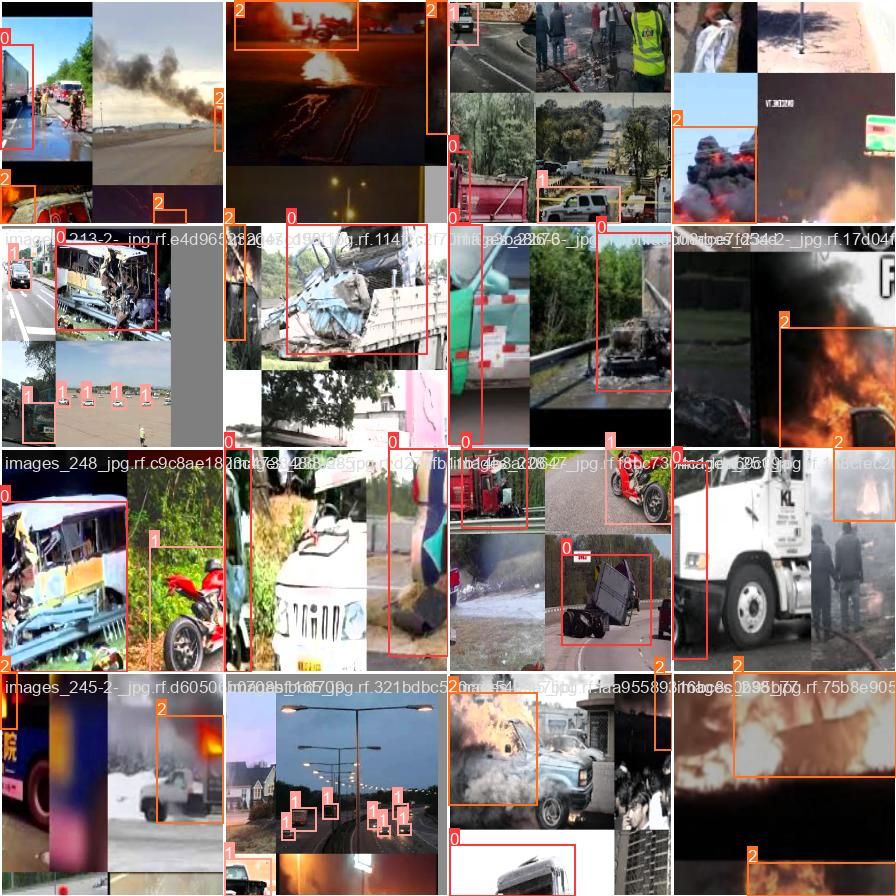

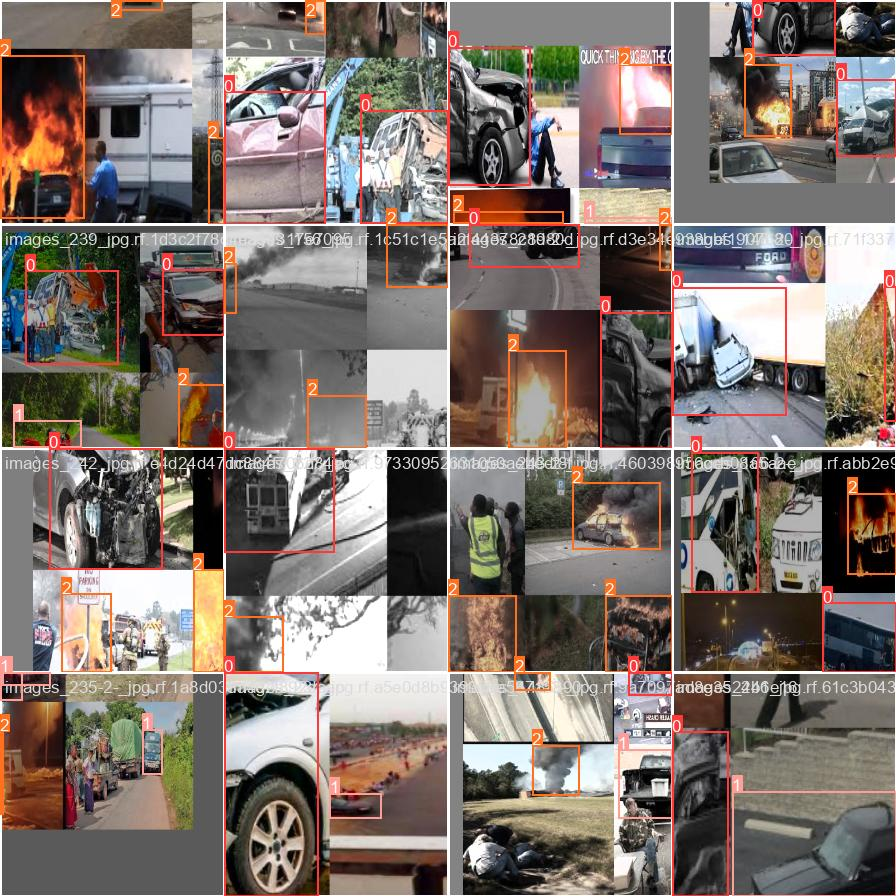

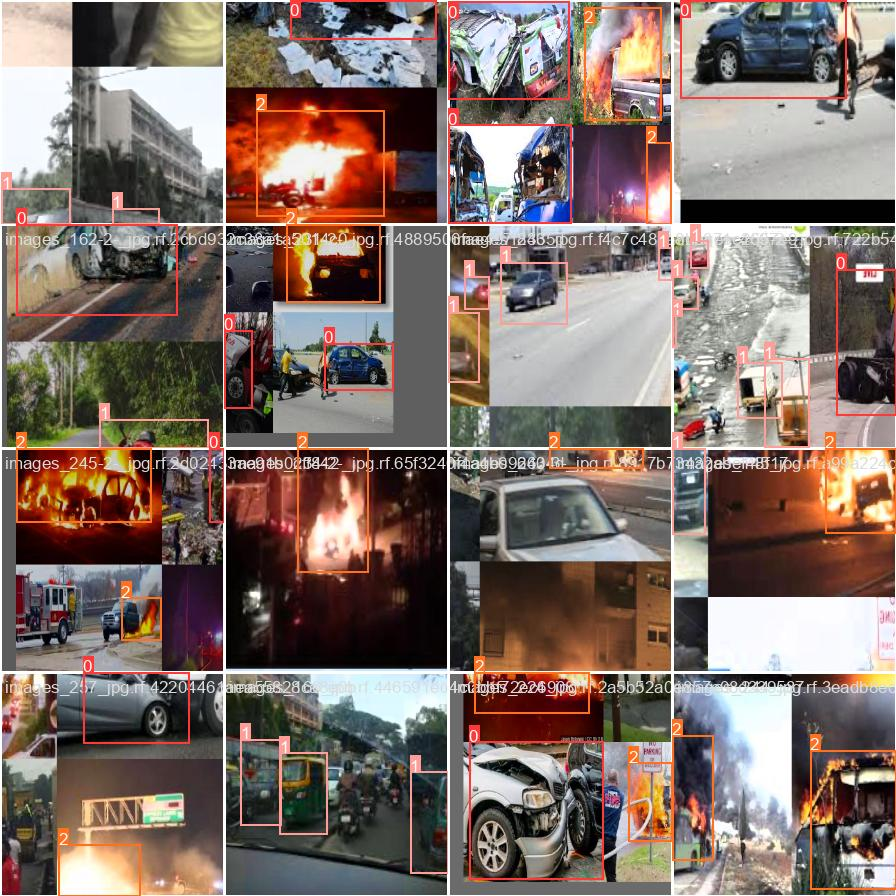

In [ ]:

import glob
from IPython.display import Image, display

# Get paths of all .jpg images in the directory
image_paths = glob.glob('runs/detect/train9/*.jpg')

# Print the paths found
print("Image paths found:", image_paths)

# Check if any images were found
if image_paths:
    for image_path in image_paths[:3]:  # Display the first 3 images
        display(Image(filename=image_path, width=600))
else:
    print("No images found in the specified directory.")